**Exercício 2**

Desenvolver um sistema fuzzy através do método de Mamdani em que se deseja avaliar a inscrição de um determinado cliente para um pedido de financiamento imobiliário. Em outras palavras, o sistema deve indicar se o cliente pode ser considerado potencialmente apto para receber tal financiamento. Têm-se ás seguintes variáveis conforme mostra a tabela na lista:

Para o desenvolvimento desse sistema têm-se o seguinte conjunto de regras:
• Regra 1: se o valor dos bens é baixo e a renda mensal é baixa, então otencialidade do
cliente é baixa;
• Regra 2: se o valor dos bens é baixo e a renda mensal é média, então potencialidade do
cliente é baixa;
• Regra 3: se o valor dos bens é baixo e a renda mensal é alta, então potencialidade do
cliente é média;
• Regra 4: se o valor dos bens é baixo e a renda mensal é muito alta, então potencialidade
do cliente é alta;
• Regra 5: se o valor dos bens é médio e a renda mensal é baixa, então potencialidade do
cliente é baixa;
• Regra 6: se o valor dos bens é médio e a renda mensal é média, então potencialidade do
cliente é média;
• Regra 7: se o valor dos bens é médio e a renda mensal é alta, então potencialidade do
cliente é alta;
• Regra 8: se o valor dos bens é médio e a renda mensal é muito alta, então potencialidade
do cliente é alta;
• Regra 9: se o valor dos bens é alto e a renda mensal é baixa, então potencialidade do
cliente é média.
• Regra 10: se o valor dos bens é alto e a renda mensal é média, então potencialidade do
cliente é média;
• Regra 11: se o valor dos bens é alto e a renda mensal é alta, então potencialidade do
cliente é alta;
• Regra 12: se o valor dos bens é alto e a renda mensal é muito alta, então potencialidade
do cliente é alta.

In [2]:
!pip install networkx==2.3
!pip install scikit-fuzzy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.3 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556008 sha256=2c1176901af498b757ff799fafe094e2aa9e58d5b09b685bbe8522401013c85d
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |█████████

In [4]:
import numpy as npy
import skfuzzy as fzzy
from skfuzzy import control as ctrl

valor_bens = ctrl.Antecedent(npy.arange(0, 10000, 1), 'bens')
renda = ctrl.Antecedent(npy.arange(1000, 10000, 1), 'renda')
cliente = ctrl.Consequent(npy.arange(0, 10, 1), 'cliente')

valor_bens['baixo'] = fzzy.trimf(valor_bens.universe, [-4000, 0, 4000])
valor_bens['medio'] = fzzy.trimf(valor_bens.universe, [1000, 5000, 9000])
valor_bens['alto'] = fzzy.trimf(valor_bens.universe, [6000, 10000, 14000])

renda['baixa'] = fzzy.trimf(renda.universe, [-3200, 1000, 3400])
renda['media'] = fzzy.trimf(renda.universe, [1000, 3400, 6700])
renda['alta'] = fzzy.trimf(renda.universe, [3400, 6700, 10000])
renda['muito_alta'] = fzzy.trimf(renda.universe, [6700, 10000, 13300])

cliente['baixo'] = fzzy.trapmf(cliente.universe, [-3.6, -0.4, 0.4, 3.6])
cliente['medio'] = fzzy.trimf(cliente.universe, [1, 5, 9])
cliente['alto'] = fzzy.trimf(cliente.universe, [6, 10, 14])

In [6]:
regra1 = ctrl.Rule(valor_bens['baixo'] & renda['baixa'], cliente['baixo'])
regra2 = ctrl.Rule(valor_bens['baixo'] & renda['media'], cliente['baixo'])
regra3 = ctrl.Rule(valor_bens['baixo'] & renda['alta'], cliente['medio'])
regra4 = ctrl.Rule(valor_bens['baixo'] & renda['muito_alta'], cliente['alto'])
regra5 = ctrl.Rule(valor_bens['medio'] & renda['baixa'], cliente['baixo'])
regra6 = ctrl.Rule(valor_bens['medio'] & renda['media'], cliente['medio'])
regra7 = ctrl.Rule(valor_bens['medio'] & renda['alta'], cliente['alto'])
regra8 = ctrl.Rule(valor_bens['medio'] & renda['muito_alta'], cliente['alto'])
regra9 = ctrl.Rule(valor_bens['alto'] & renda['baixa'], cliente['medio'])
regra10 = ctrl.Rule(valor_bens['alto'] & renda['media'], cliente['medio'])
regra11 = ctrl.Rule(valor_bens['alto'] & renda['alta'], cliente['alto'])
regra12 = ctrl.Rule(valor_bens['alto'] & renda['muito_alta'], cliente['alto'])

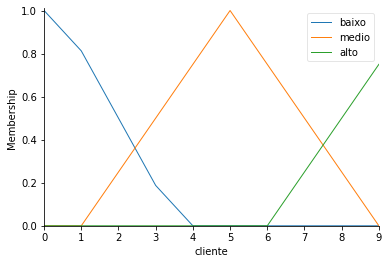

In [8]:
cliente.view()

**Exercício 3**

Desenvolver um sistema de monitoramento de um tanque baseado em lógica fuzzy. O
objetivo dele é detectar e isolar 3 possíveis falhas (ver mais abaixo). A figura na lista
mostra o referido sistema.

Suponha que a taxa do fluxo de entrada (Fent) é fixa enquanto a taxa do fluxo de saída
(Fsai) e o nível do líquido (h) são medidos. Quando o sistema está estável, o valor nominal
do fluxo de saída é 3.3-3 m3 /min. Quando o fluxo de saída é menor do que 3.3-3 m3 /min, ele
é considerado “baixo”. O valor nominal do nível do líquido (h) é 1.2 m e é considerado
“baixo” está abaixo de 1 m, e “alto” quando está acima de 1.4 m. O sistema tem 3 possíveis
falhas:
a) desgaste do tubo de saída
b) entupimento do tudo de saída
c) vazamento do tanque
O requisito para o sistema fuzzy de monitoramento:
Entrada: 2 variáveis (taxa do fluxo de saída e nível do líquido)
Saída: 3 variáveis (sinais) indicam a possibilidade da ocorrência da falha

As regras de inferência para o sistema são:
• se (fsai é normal) e (nível é normal) então (f1 não ocorre) (f2 não ocorre) (f3 não ocorre)
• se (fsai é normal) e (nível é baixo) então (f1 ocorre) (f2 não ocorre) (f3 não ocorre)
• se (fsai é normal) e (nível é alto) então (f1 não ocorre) (f2 ocorre) (f3 não ocorre)
• se (fsai é baixo) e (nível é baixo) então (f1 não ocorre) (f2 não ocorre) (f3 ocorre)

In [29]:
fluxo_saida = ctrl.Antecedent(npy.arange(0.0025, 0.0041, 0.0001), 'fluxo_saida')
nivel_liquido = ctrl.Antecedent(npy.arange(1, 1.5, 0.1), 'nivel_liquido')
falha1 = ctrl.Consequent(npy.arange(0, 1.1, 0.1), 'falha1')
falha2 = ctrl.Consequent(npy.arange(0, 1.1, 0.1), 'falha2')
falha3 = ctrl.Consequent(npy.arange(0, 1.1, 0.1), 'falha3')

fluxo_saida['baixo'] = fzzy.trapmf(fluxo_saida.universe, [0.000481, 0.0025, 0.003, 0.0033])
fluxo_saida['normal'] = fzzy.trimf(fluxo_saida.universe, [0.003, 0.0033, 0.0036])

nivel_liquido['baixo'] = fzzy.trimf(nivel_liquido.universe, [0.84, 1, 1.2])
nivel_liquido['normal'] = fzzy.trimf(nivel_liquido.universe, [1, 1.2, 1.4])
nivel_liquido['alto'] = fzzy.trimf(nivel_liquido.universe, [1.2, 1.4, 1.56])

falha1['ocorre'] = fzzy.gaussmf(falha1.universe, 0.5, 0.1)
falha1['não ocorre'] = fzzy.fuzzy_not(fzzy.gaussmf(falha1.universe, 0.5, 0.1))
falha2['ocorre'] = fzzy.gaussmf(falha2.universe, 0.5, 0.1)
falha2['não ocorre'] = fzzy.fuzzy_not(fzzy.gaussmf(falha2.universe, 0.5, 0.1))
falha3['ocorre'] = fzzy.gaussmf(falha3.universe, 0.5, 0.1)
falha3['não ocorre'] = fzzy.fuzzy_not(fzzy.gaussmf(falha3.universe, 0.5, 0.1))

In [31]:
regra1 = ctrl.Rule(fluxo_saida['normal'] & nivel_liquido['normal'], falha1['não ocorre'])
regra2 = ctrl.Rule(fluxo_saida['normal'] & nivel_liquido['normal'], falha2['não ocorre'])
regra3 = ctrl.Rule(fluxo_saida['normal'] & nivel_liquido['normal'], falha3['não ocorre'])
regra4 = ctrl.Rule(fluxo_saida['normal'] & nivel_liquido['baixo'], falha1['ocorre'])
regra5 = ctrl.Rule(fluxo_saida['normal'] & nivel_liquido['baixo'], falha2['não ocorre'])
regra6 = ctrl.Rule(fluxo_saida['normal'] & nivel_liquido['baixo'], falha3['não ocorre'])
regra7 = ctrl.Rule(fluxo_saida['normal'] & nivel_liquido['alto'], falha1['não ocorre'])
regra8 = ctrl.Rule(fluxo_saida['normal'] & nivel_liquido['alto'], falha2['ocorre'])
regra9 = ctrl.Rule(fluxo_saida['normal'] & nivel_liquido['alto'], falha3['não ocorre'])
regra10 = ctrl.Rule(fluxo_saida['baixo'] & nivel_liquido['baixo'], falha1['não ocorre'])
regra11 = ctrl.Rule(fluxo_saida['baixo'] & nivel_liquido['baixo'], falha2['não ocorre'])
regra12 = ctrl.Rule(fluxo_saida['baixo'] & nivel_liquido['baixo'], falha3['ocorre'])

In [ ]:
falha1.view()
falha2.view()
falha3.view()

**Exercício 4**

Desenvolver um sistema fuzzy (método de Mamdani) que determine o grau de risco de um
ataque cardíaco, usando as variáveis dieta, exercício e risco. Observe a tabela na lista:

As regras de inferência para o sistema são:
• se dieta é baixa E exercício é alto então risco é baixo
• se dieta é alta OU exercício é baixo então risco é alto
Suponha agora que:
Dieta: consuma 3000 calorias por dia.
Exercício: gaste (queime) 1000 calorias por dia.
Qual é o risco de um ataque cardíaco?

In [37]:
calorias_consumidas = ctrl.Antecedent(npy.arange(0, 5000, 10), 'calorias_consumidas')
calorias_gastas = ctrl.Antecedent(npy.arange(0, 2000, 10), 'calorias_gastas')
risco_ataque = ctrl.Consequent(npy.arange(0, 100, 10), 'risco_ataque')

calorias_consumidas['baixas'] = fzzy.trimf(calorias_consumidas.universe, [0, 0, 5000])
calorias_consumidas['altas'] = fzzy.trimf(calorias_consumidas.universe, [2500, 2500, 5000])

calorias_gastas['baixas'] = fzzy.trimf(calorias_gastas.universe, [0, 0, 2000])
calorias_gastas['altas'] = fzzy.trimf(calorias_gastas.universe, [1000, 1000, 2000])

risco_ataque['baixo'] = fzzy.trimf(risco_ataque.universe, [0, 0, 100])
risco_ataque['alto'] = fzzy.trimf(risco_ataque.universe, [50, 50, 100])

In [38]:
regra1 = ctrl.Rule(calorias_consumidas['baixas'] & calorias_gastas['altas'], risco_ataque['baixo'])
regra2 = ctrl.Rule(calorias_consumidas['altas'] | calorias_gastas['baixas'], risco_ataque['alto'])

In [ ]:
risco_ctrl = ctrl.ControlSystem([regra1, regra2])
risco_simulador = ctrl.ControlSystemSimulation(risco_ctrl)

# Entrando com alguns valores para fluxo de saída e nível do líquido
risco_simulador.input['calorias_consumidas'] = 3000
risco_simulador.input['calorias_gastas'] = 1000

# Computando o resultado
risco_simulador.compute()
print(risco_simulador.output['risco_ataque'])

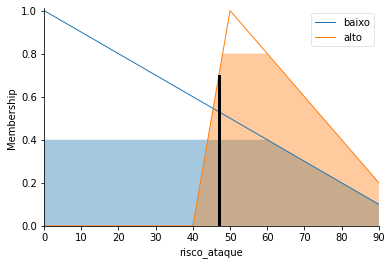

In [40]:
risco_ataque.view(sim=risco_simulador)

**Exercício 5**

Desenvolva um sistema de inferência fuzzy (Mamdani) com duas variáveis de entrada que
representam o número de anos de educação e o número de anos de experiência, e uma
variável de saída que representa o salário. Suponha o que diz na tabela na lista:

As regras de inferência para o sistema são:
• R1: se a educação é baixa E a experiência é baixa, então o salário é muito baixo
• R2: se a educação é baixa E a experiência é média, então o salário é baixo
• R3: se a educação é baixa E a experiência é alta, então o salário é médio
• R4: se a educação é média E a experiência é baixa, então o salário é baixo
• R5: se a educação é média E a experiência é média, então o salário é médio
• R6: se a educação é média E a experiência alta, então o salário é alto
• R7: se a educação é alta E a experiência é baixa, então o salário é médio
• R8: se a escolaridade é alta E a experiência é média, então o salário é alto
• R9: se a escolaridade é alta E a experiência é alta, então o salário é muito alto

Suponha agora que:
Educação: 10 anos.
Experiência: 18.6 anos.
Qual é o salário correspondente?

In [42]:
anos_educacao = ctrl.Antecedent(npy.arange(0, 15, 1), 'anos_educacao')
anos_experiencia = ctrl.Antecedent(npy.arange(0, 25, 1), 'anos_experiencia')
salario =  ctrl.Consequent(npy.arange(20, 200, 1), 'salario')

anos_educacao['baixa'] = fzzy.gaussmf(anos_educacao.universe, 2.5, 0.5)
anos_educacao['media'] = fzzy.gaussmf(anos_educacao.universe, 7.5, 0.5)
anos_educacao['alta'] = fzzy.gaussmf(anos_educacao.universe, 12.5, 0.5)

anos_experiencia['baixa'] = fzzy.gaussmf(anos_experiencia.universe, 5.0, 0.5)
anos_experiencia['media'] = fzzy.gaussmf(anos_experiencia.universe, 15.0, 0.5)
anos_experiencia['alta'] = fzzy.gaussmf(anos_experiencia.universe, 20.0, 0.5)

salario['muito_baixo'] = fzzy.gaussmf(salario.universe, 40.0, 0.5)
salario['baixo'] = fzzy.gaussmf(salario.universe, 60.0, 0.5)
salario['medio'] = fzzy.gaussmf(salario.universe, 100.0, 0.5)
salario['alto'] = fzzy.gaussmf(salario.universe, 150.0, 0.5)
salario['muito_alto'] = fzzy.gaussmf(salario.universe, 180.0, 0.5)

In [43]:
regra1 = ctrl.Rule(anos_educacao['baixa'] & anos_experiencia['baixa'], salario['muito_baixo'])
regra2 = ctrl.Rule(anos_educacao['baixa'] & anos_experiencia['media'], salario['baixo'])
regra3 = ctrl.Rule(anos_educacao['baixa'] & anos_experiencia['alta'], salario['medio'])
regra4 = ctrl.Rule(anos_educacao['media'] & anos_experiencia['baixa'], salario['baixo'])
regra5 = ctrl.Rule(anos_educacao['media'] & anos_experiencia['media'], salario['medio'])
regra6 = ctrl.Rule(anos_educacao['media'] & anos_experiencia['alta'], salario['alto'])
regra7 = ctrl.Rule(anos_educacao['alta'] & anos_experiencia['baixa'], salario['medio'])
regra8 = ctrl.Rule(anos_educacao['alta'] & anos_experiencia['media'], salario['alto'])
regra9 = ctrl.Rule(anos_educacao['alta'] & anos_experiencia['alta'], salario['alto'])

In [44]:
salario_ctrl = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])
salario_simulador = ctrl.ControlSystemSimulation(salario_ctrl)

# Entrando com alguns valores para fluxo de saída e nível do líquido
salario_simulador.input['anos_educacao'] = 10
salario_simulador.input['anos_experiencia'] = 18.6

# Computando o resultado
salario_simulador.compute()
print(salario_simulador.output['salario'])

149.8965629623287


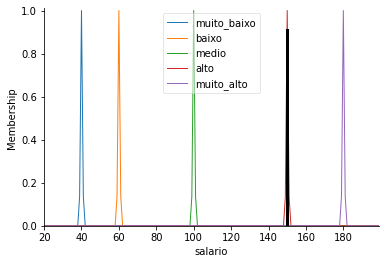

In [45]:
salario.view(sim=salario_simulador)